#### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset and subset columns

In [2]:
houseprice_data = pd.read_csv("data/HousingPricesData.csv")

In [3]:
houseprice_data = houseprice_data[['Price', 'Area', 'Room']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
houseprice_data.head()

,Price,Area,Room
0,685000.0,64,3
1,475000.0,60,3
2,850000.0,109,4
3,580000.0,128,6
4,720000.0,138,5


In [5]:
houseprice_data.shape

(924, 3)

#### Calculate the Interquartile Range (IQR)

In [6]:
Q1 = houseprice_data['Price'].quantile(0.25)
Q3 = houseprice_data['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

350000.0


#### Identify Outliers

In [7]:
outliers = houseprice_data['Price'][(houseprice_data['Price'] < (Q1 - 1.5 * IQR)) |(houseprice_data['Price'] > (Q3 + 1.5 * IQR))]

In [8]:
outliers.shape

(71,)

#### Remove Outliers based on IQR

In [9]:
houseprice_data_no_outliers = houseprice_data.drop(outliers.index, axis = 0)

In [10]:
houseprice_data_no_outliers.shape

(853, 3)

#### Visualise Dataset

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

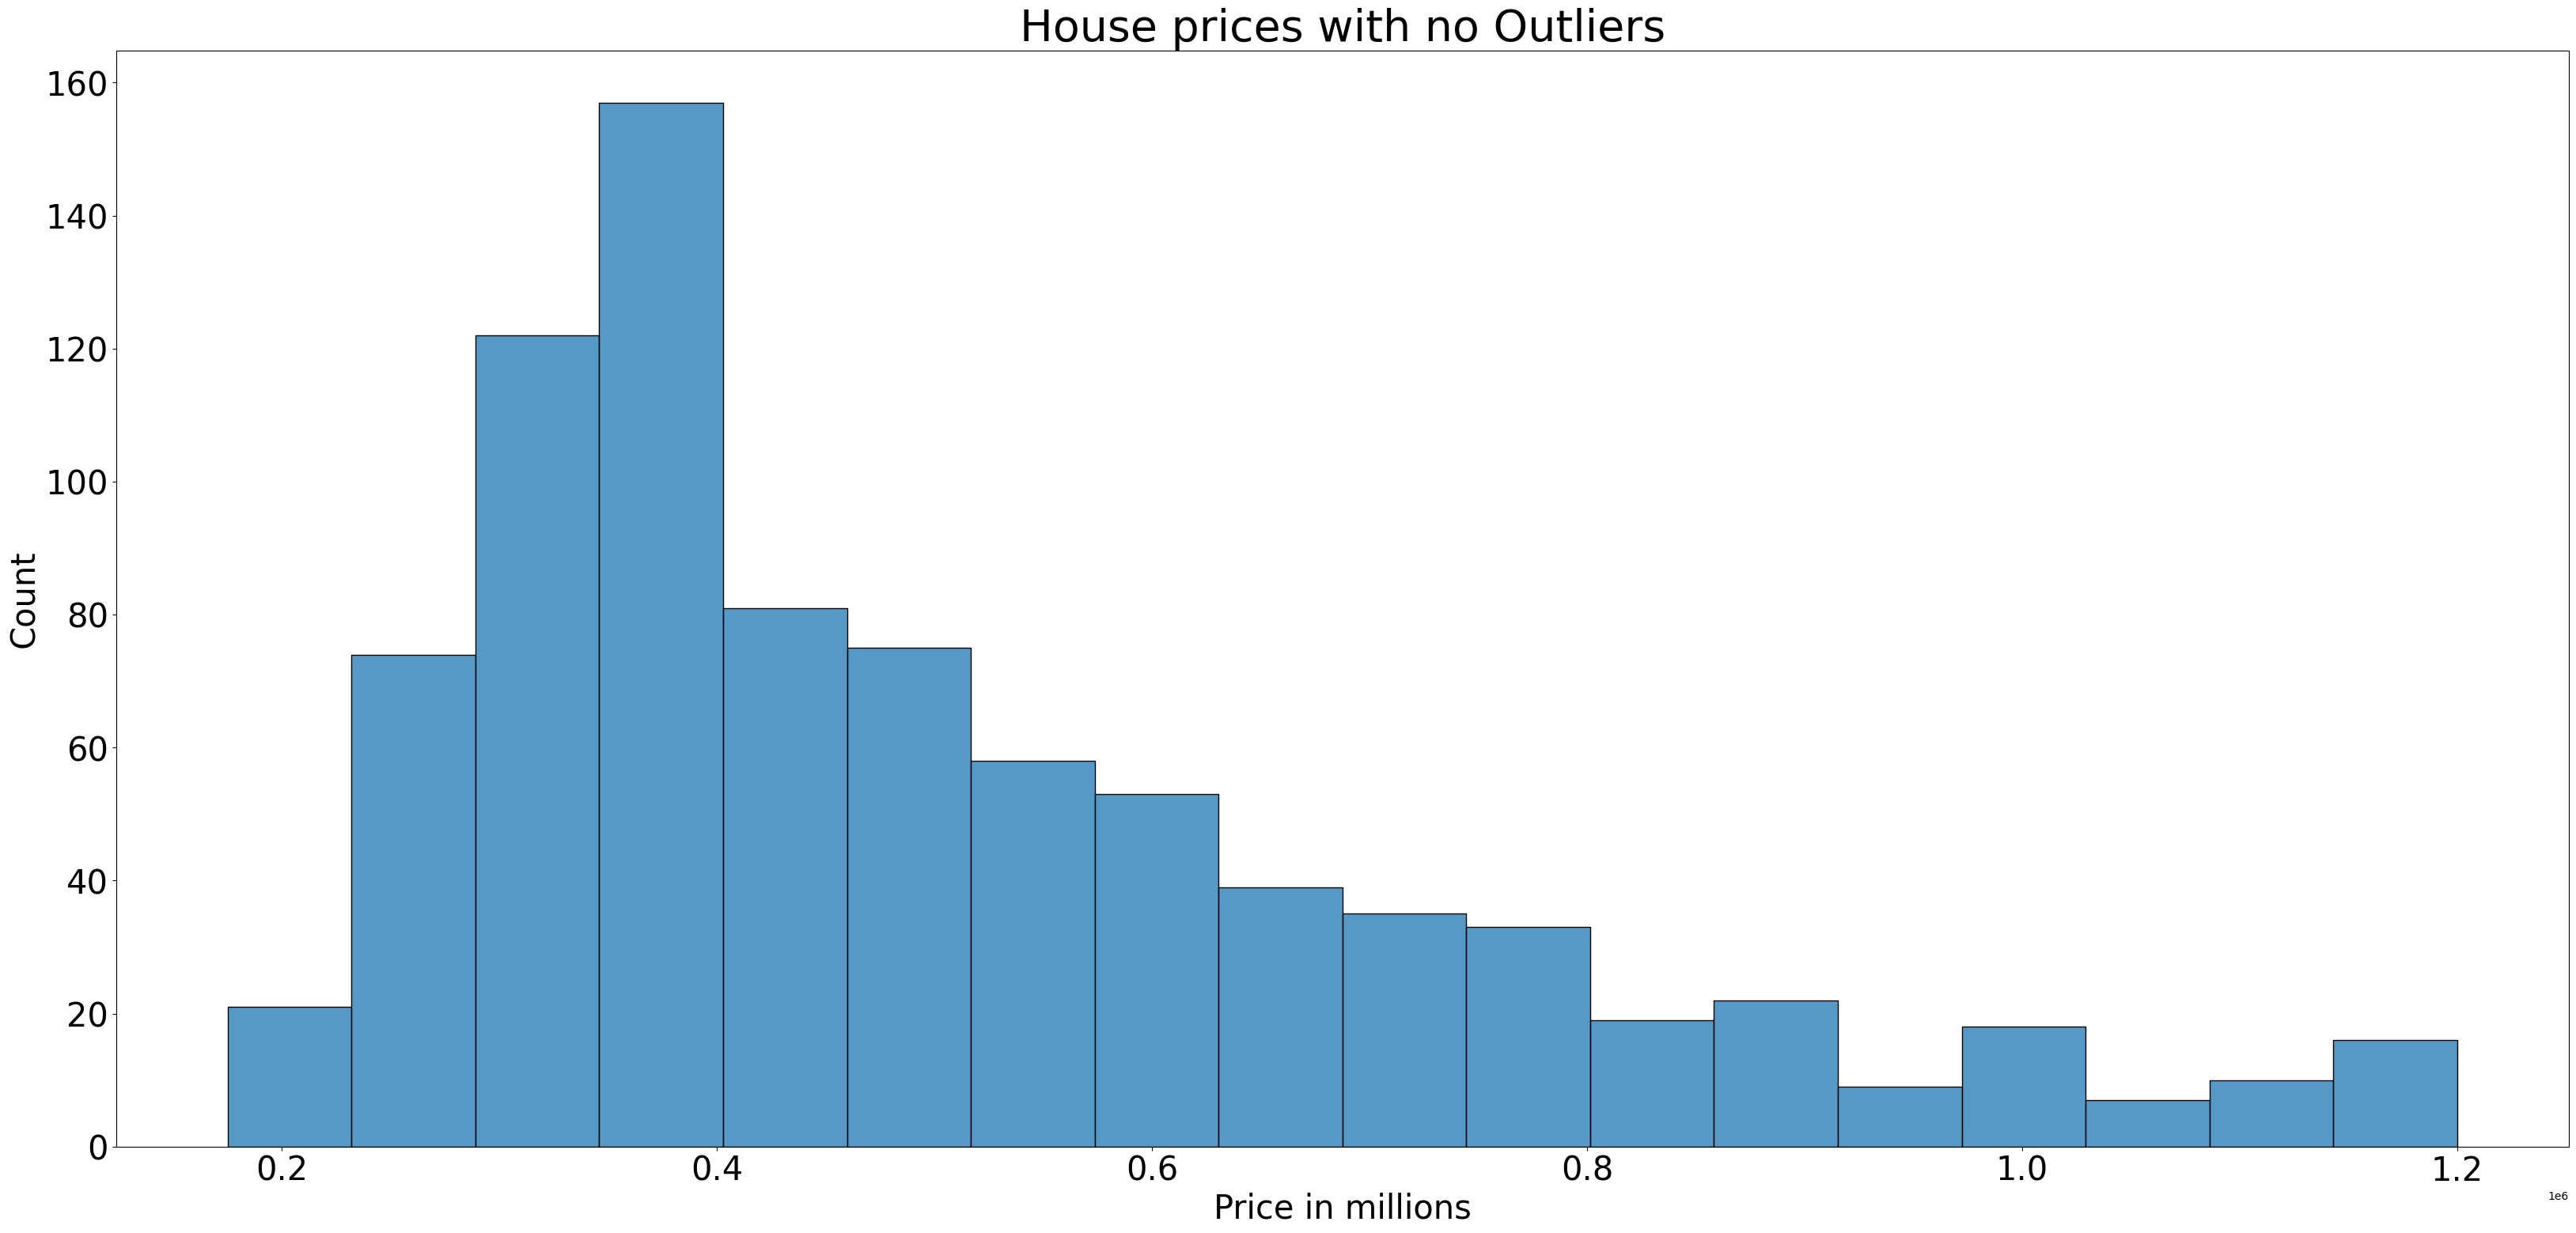

In [11]:
plt.figure(figsize = (40,18))

ax = sns.histplot(data= houseprice_data_no_outliers, x= 'Price')
ax.set_xlabel('Price in millions', fontsize = 30)
ax.set_title('House prices with no Outliers', fontsize = 40)
ax.set_ylabel('Count',  fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)